In [50]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso
from sklearn.metrics import max_error ,mean_absolute_error ,mean_squared_error ,r2_score
from sklearn.model_selection import cross_val_score ,ShuffleSplit

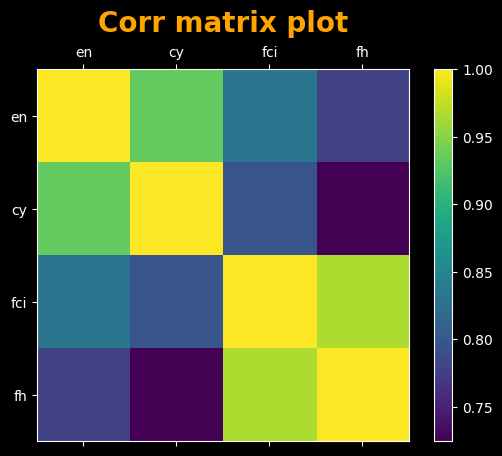

In [52]:
# prepration
fc_data =pd.read_csv('datasets/fuelConsumptionData.csv')
fc_informative_data =fc_data.select_dtypes(exclude =['object'])
x =fc_informative_data[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_CITY' ,'FUELCONSUMPTION_HWY']]
y =fc_informative_data['CO2EMISSIONS'] 
x_arr =x.to_numpy(np.float32)
y_arr =y.to_numpy(np.int32).reshape(-1,1)
x_norm =minmax_scale(x_arr ,feature_range=(0,1)) 
x_train ,x_test ,y_train ,y_test =train_test_split(x_norm ,y_arr ,test_size=0.2)
# corr_matrix_plot
plt.style.use('dark_background')
plt.figure(num =1)
plt.matshow(x.corr() ,fignum =1)
plt.xticks(ticks =range(4) ,labels =['en' ,'cy' ,'fci' ,'fh'])
plt.yticks(ticks =range(4) ,labels =['en' ,'cy' ,'fci' ,'fh'])
plt.title('Corr matrix plot' ,{'size' : 20 ,'weight' :'bold' ,'color' :'orange'} ,pad=10)
plt.colorbar()
plt.show()

In [55]:
 # evaluation_details 
# ------------------  
def eva_scores(y_true ,y_pred) : 
    # max(yi,Yi) =max(|yi-Yi|)
    me =max_error(y_true =y_true ,y_pred =y_pred)
    # mae(yi,Yi) =1/n*Σ|yi-Yi|
    mae =mean_absolute_error(y_true =y_true ,y_pred =y_pred) 
    # mse(yi,Yi) =1/n*Σ(yi-Yi)^2
    mse =mean_squared_error(y_true =y_true ,y_pred =y_pred)
    # r2 =1 -(Σ(yi-Yi)^2/Σ(yi-Y)^2)
    r2 =r2_score(y_true =y_true ,y_pred =y_pred) 
    return { 
        'max_error' : me ,
        'mean_absolute_error' :mae ,
        'mean_squared_error' : mse , 
        'r2_score' : r2
    }

def cv_score(est) :
    cv =ShuffleSplit(n_splits =5 ,test_size =0.2)
    r2 =cross_val_score(est ,x_train ,y_train ,cv =cv ,scoring ='r2')
    r2_mean =np.mean(r2)
    return r2_mean

def eva_plot(Y_test) :
    plt.style.use('dark_background')
    plt.figure(num =2 ,figsize=(20,3))
    plt.subplot(1,5,1)
    plt.scatter(x_test[: ,0] ,y_test ,c ='g' ,s =20 ,marker ='x') 
    plt.scatter(x_test[: ,0] ,Y_test ,c ='y' ,s =5 ,marker ='+')
    plt.xticks([]);plt.yticks([])
    plt.xlabel('engine_size' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
    plt.ylabel('emission' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
    plt.subplot(1,5,2)
    plt.scatter(x_test[: ,1] ,y_test ,c ='g' ,s =20 ,marker ='x') 
    plt.scatter(x_test[: ,1] ,Y_test ,c ='y' ,s =5 ,marker ='+')
    plt.xticks([]);plt.yticks([])
    plt.xlabel('cylinder' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
    plt.ylabel('emission' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
    plt.subplot(1,5,3)
    plt.scatter(x_test[: ,2] ,y_test ,c ='g' ,s =20 ,marker ='x') 
    plt.scatter(x_test[: ,2] ,Y_test ,c ='y' ,s =5 ,marker ='+')
    plt.xticks([]);plt.yticks([])
    plt.xlabel('fuelConsumption_city' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
    plt.ylabel('emission' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
    plt.subplot(1,5,4)
    plt.scatter(x_test[: ,3] ,y_test ,c ='g' ,s =20 ,marker ='x') 
    plt.scatter(x_test[: ,3] ,Y_test ,c ='y' ,s =5 ,marker ='+')
    plt.xticks([]);plt.yticks([])
    plt.xlabel('fuelConsumption_hwy' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
    plt.ylabel('emission' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
    plt.show()

 evaluation_scores : 
 {'max_error': 76.80276489257812, 'mean_absolute_error': 16.875111089688595, 'mean_squared_error': 567.8561854635313, 'r2_score': 0.8473725914955139} 

 cv_score : 
 0.8505629658699035 



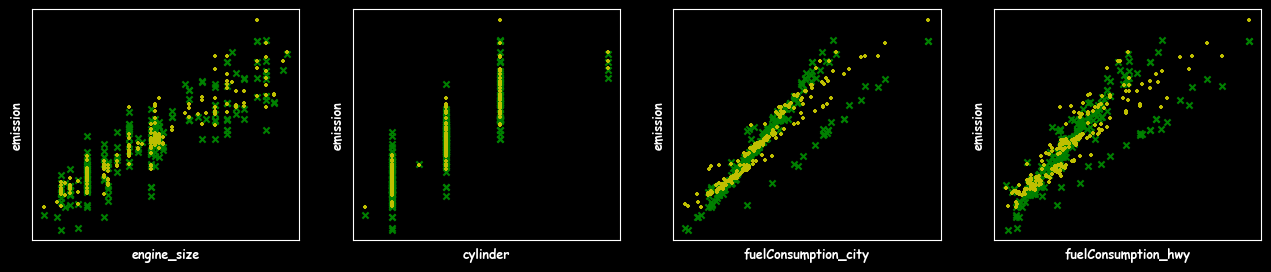

In [56]:
# ordinary_least_squares_model
# ----------------------------
ols =LinearRegression() 
# training
ols.fit(x_train ,y_train)
# prediction
Y_test_ols =ols.predict(x_test)
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_ols),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(ols),
    '\n')
# evaluation_plot
eva_plot(Y_test_ols)

 evaluation_scores : 
 {'max_error': 75.69747924804688, 'mean_absolute_error': 16.85995797130549, 'mean_squared_error': 555.6233631377979, 'r2_score': 0.850660502910614} 

 cv_score : 
 0.8652881622314453 



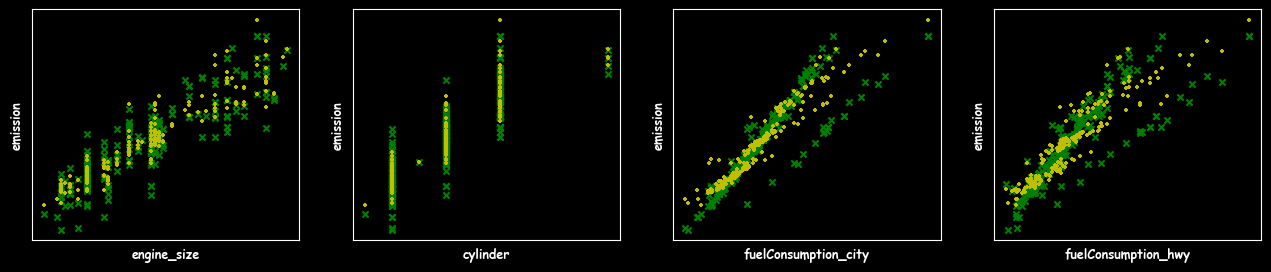

In [58]:
# ridge_regression_model
# ----------------------
ridge =Ridge()
# training 
ridge.fit(x_train ,y_train) 
# prediction
coefs =ridge.coef_
intercept =ridge.intercept_
Y_test_ridge =((x_test[:,0] *coefs[0 ,0]) + (x_test[:,1] *coefs[0 ,1]) + (x_test[:,2] *coefs[0 ,2]) + (x_test[:,3] *coefs[0 ,3]) + intercept).reshape(-1,1)
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_ridge),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(ridge),
    '\n')
# evaluation_plot
eva_plot(Y_test_ridge)

 evaluation_scores : 
 {'max_error': 67.4378662109375, 'mean_absolute_error': 17.366063982526832, 'mean_squared_error': 553.0559597594465, 'r2_score': 0.8513506054878235} 

 cv_score : 
 0.8527812004089356 



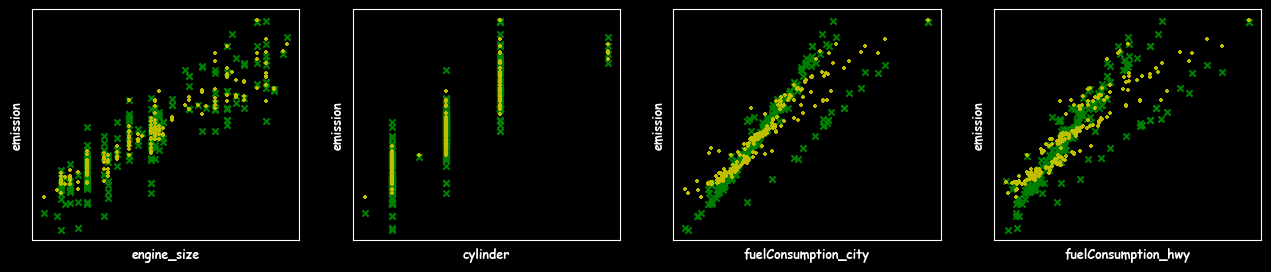

In [59]:
# lasso_model
# -----------
lasso =Lasso() 
# training
lasso.fit(x_train ,y_train)
# prediction
Y_test_lasso =lasso.predict(x_test) 
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_lasso),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(ridge),
    '\n')
# evaluation_plot
eva_plot(Y_test_lasso)